In [236]:
import numpy as np
from pca import pca
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

# use seaborn plotting style defaults


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [218]:
#df = pd.read_csv('heart_failure_clinical_records_dataset.csv') Maternal Health Risk Data Set
df = pd.read_csv('cancer patient data sets.csv')
df.drop('index',axis=1,inplace=True)
df.drop('Patient Id',axis=1,inplace=True)
# df.drop('creatinine_phosphokinase',axis=1,inplace=True)
# df.drop('ejection_fraction',axis=1,inplace=True)
# df.drop('anaemia',axis=1,inplace=True)
df = df.fillna(0)
df.head(n=5)
#df.shape


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [224]:

df['Level'].replace(['Low','Medium','High'],[0.0,1.0,2.0],inplace=True)
# df['ever_married'].replace(['No','Yes'],[0,1],inplace=True)

# df['work_type'].replace(['Private','Self-employed','Govt_job','children','Never_worked'],[0,1,2,3,4],inplace=True)
# df['Residence_type'].replace(['Rural','Urban'],[0,1],inplace=True)
# df.drop('Obesity',axis=1,inplace=True)
# df.drop('Smoking',axis=1,inplace=True)
# df.drop('Chest Pain',axis=1,inplace=True)
# df.drop('Shortness of Breath',axis=1,inplace=True)
# df.drop('Snoring',axis=1,inplace=True)
# df.drop('Fatigue',axis=1,inplace=True)
# df.drop('Dry Cough',axis=1,inplace=True)
df.info()
df.head(n=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [225]:
# CLASSES 
Y = df['Level']
target = df['Level'].to_numpy()
Y.shape
# y = df['DEATH_EVENT']
# target = df['DEATH_EVENT'].to_numpy()

(1000,)

In [226]:
# Features
# Data Matrix
X = df.iloc[:,0:8]
#X = X.head(864)
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease
0,33,1,2,4,5,4,3,2
1,17,1,3,1,5,3,4,2
2,35,1,4,5,6,5,5,4
3,37,1,7,7,7,7,6,7
4,46,1,6,8,7,7,7,6
...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6
996,37,2,6,8,7,7,7,6
997,25,2,4,5,6,5,5,4
998,18,2,6,8,7,7,7,6


In [140]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0


In [141]:
# STANDARDIZATION OF DATA
X_st = StandardScaler().fit_transform(X)
df_st = pd.DataFrame(X_st)
df_st.columns = X.columns

# print the standardized data
df_st.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,4.074519e-17,1.0005,-1.931249,-0.785367,-0.097838,0.652194,2.985627
Gender,1000.0,4.324319e-16,1.0005,-0.819903,-0.819903,-0.819903,1.219657,1.219657
Air Pollution,1000.0,8.881784e-17,1.0005,-1.399439,-0.906679,-0.413919,1.064362,2.049883
Alcohol use,1000.0,1.345313e-16,1.0005,-1.360357,-0.978556,0.166847,0.930449,1.312250
Dust Allergy,1000.0,7.904788e-17,1.0005,-2.103703,-0.588431,0.421751,0.926842,1.431932
OccuPational Hazards,1000.0,6.698808e-17,1.0005,-1.822712,-0.873383,0.075946,1.025275,1.499940
Genetic Risk,1000.0,-6.120104e-17,1.0005,-1.683965,-1.213584,0.197560,1.138323,1.138323
chronic Lung Disease,1000.0,4.415912e-17,1.0005,-1.829407,-0.746918,-0.205673,0.876816,1.418061


In [142]:
# Generate Observarions and Variables for the data

observations = list(df_st.index)
print("observations are ",observations)
variables = list(df_st.columns)
print("variables are ", variables)

observations are  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

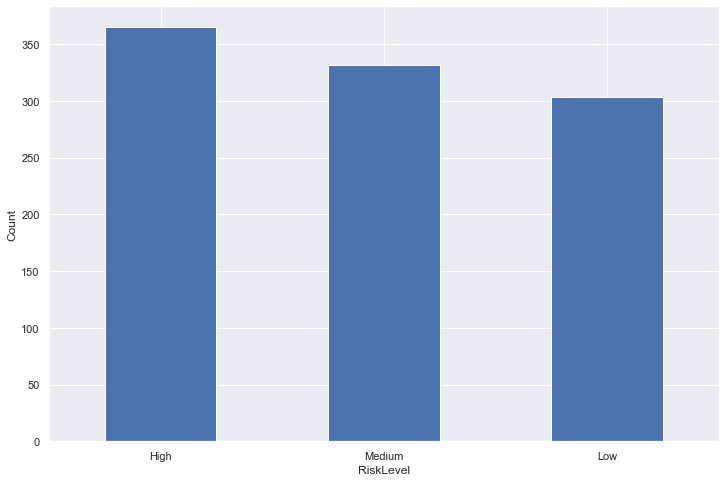

In [143]:
# DATA VISUALIZATION
# Class Distribution

Y.value_counts().plot(kind ='bar',rot =0)
plt.xlabel('RiskLevel')
plt.ylabel('Count')
plt.show()


[Text(0, 0, 'Age'),
 Text(1, 0, 'Gender'),
 Text(2, 0, 'Air Pollution'),
 Text(3, 0, 'Alcohol use'),
 Text(4, 0, 'Dust Allergy'),
 Text(5, 0, 'OccuPational Hazards'),
 Text(6, 0, 'Genetic Risk'),
 Text(7, 0, 'chronic Lung Disease')]

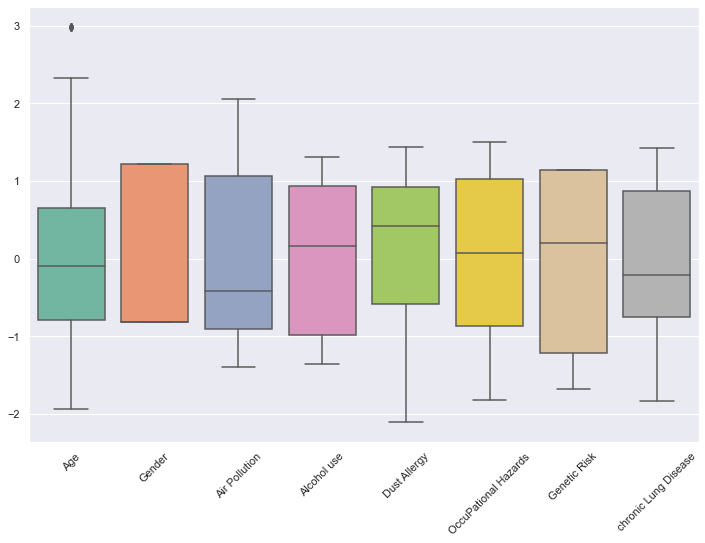

In [144]:
# BOX and Whiskers PLOT
ax = plt.figure()
ax = sns.boxplot(data=df_st,orient='v',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'Age'),
 Text(1, 0, 'Gender'),
 Text(2, 0, 'Air Pollution'),
 Text(3, 0, 'Alcohol use'),
 Text(4, 0, 'Dust Allergy'),
 Text(5, 0, 'OccuPational Hazards'),
 Text(6, 0, 'Genetic Risk'),
 Text(7, 0, 'chronic Lung Disease')]

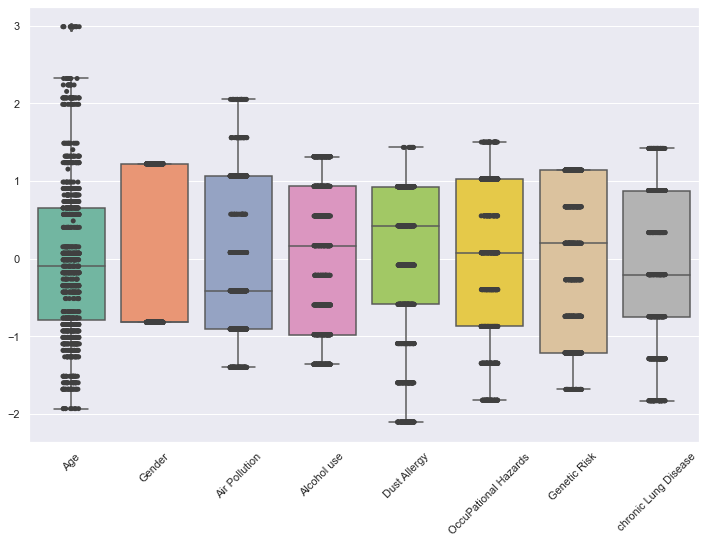

In [145]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
ax = plt.figure()
ax = sns.boxplot(data=df_st,orient='v',palette='Set2')
ax = sns.stripplot(data=df_st,color='.25')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [146]:
# Describe the new Data
df_st.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.074519e-17,4.324319e-16,8.881784e-17,1.345313e-16,7.904788e-17,6.698808e-17,-6.120104e-17,4.415912e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.931249e+00,-8.199029e-01,-1.399439e+00,-1.360357e+00,-2.103703e+00,-1.822712e+00,-1.683965e+00,-1.829407e+00
25%,-7.853668e-01,-8.199029e-01,-9.066790e-01,-9.785557e-01,-5.884307e-01,-8.733827e-01,-1.213584e+00,-7.469177e-01
50%,-9.783750e-02,-8.199029e-01,-4.139187e-01,1.668470e-01,4.217508e-01,7.594632e-02,1.975601e-01,-2.056730e-01
75%,6.521945e-01,1.219657e+00,1.064362e+00,9.304488e-01,9.268416e-01,1.025275e+00,1.138323e+00,8.768165e-01
max,2.985627e+00,1.219657e+00,2.049883e+00,1.312250e+00,1.431932e+00,1.499940e+00,1.138323e+00,1.418061e+00


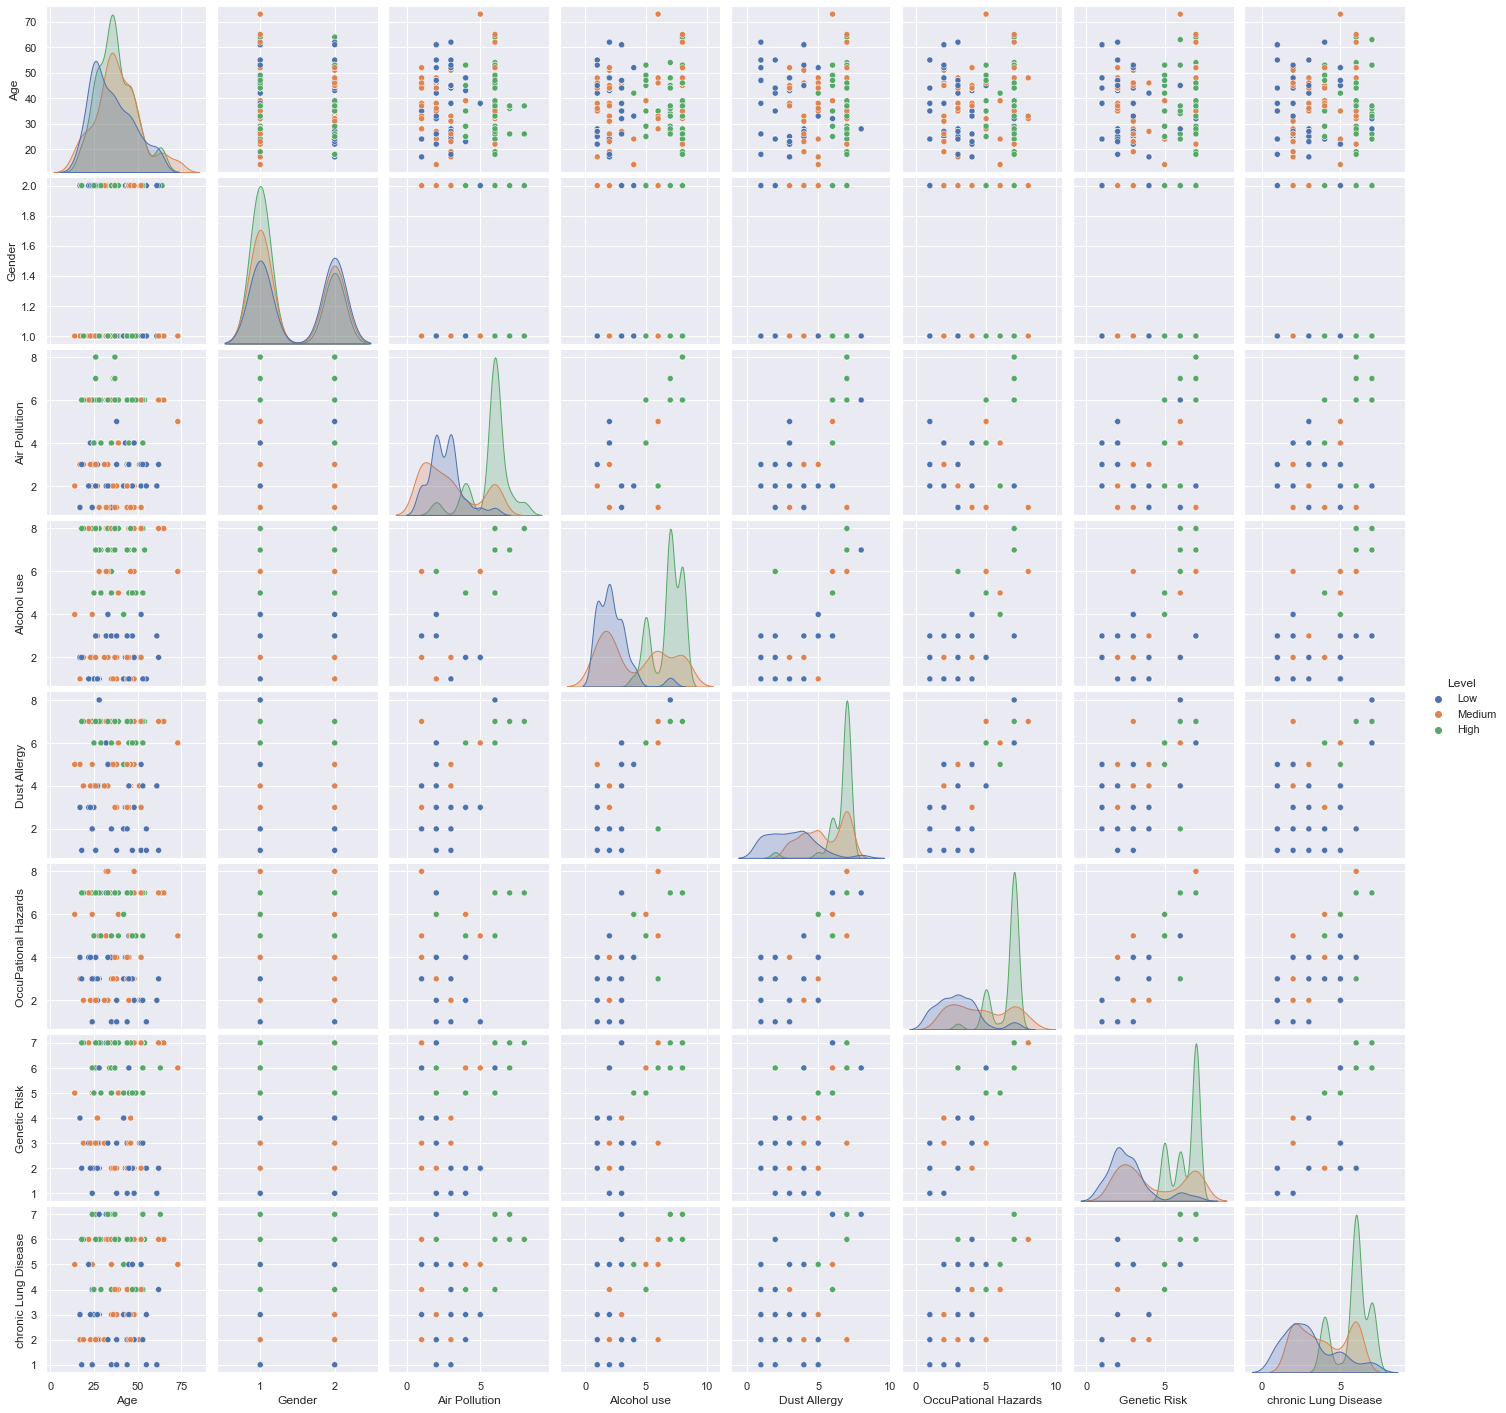

In [147]:
# PAIR PLOT
sns.pairplot(df,hue = 'Level')

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Gender'),
 Text(2.5, 0, 'Air Pollution'),
 Text(3.5, 0, 'Alcohol use'),
 Text(4.5, 0, 'Dust Allergy'),
 Text(5.5, 0, 'OccuPational Hazards'),
 Text(6.5, 0, 'Genetic Risk'),
 Text(7.5, 0, 'chronic Lung Disease')]

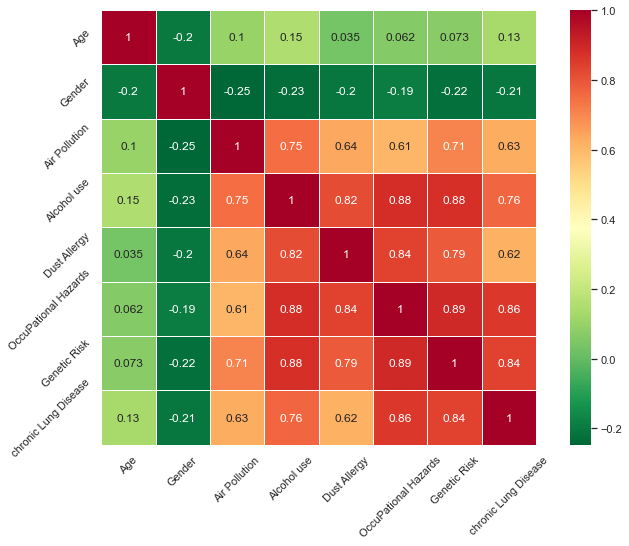

In [148]:
# COVARIENCE
dfc_st = df_st - df_st.mean()
ax = sns.heatmap(dfc_st.cov(),cmap='RdYlGn_r',linewidth=1,annot=True,cbar=True,square=True)
plt.yticks(rotation=45)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

PCA()
(1000, 8)


Text(0, 0.5, '$Z_2$')

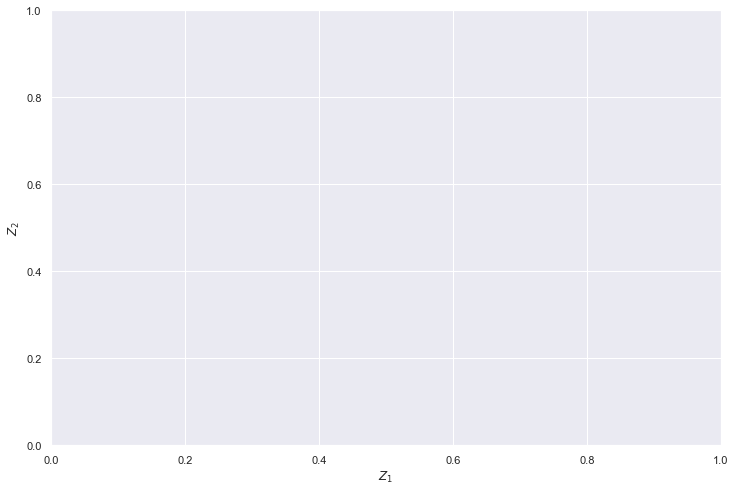

In [228]:
# Principal Component Analysis PCA
pca = PCA()
print(pca)
pca.fit(df_st)
Z = pca.fit_transform(df_st)
print(Z.shape)
plt. figure()
# plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

[-0.39306743 -0.02509874  0.10018165  0.33817243 -0.61653256 -0.396183
 -0.15282589  0.40005246]


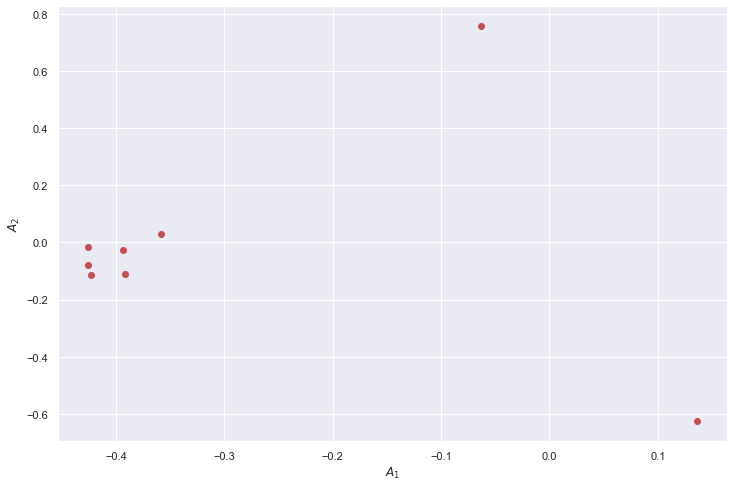

In [229]:
# EIGENVECTORS

A = pca.components_.T
# print(A.shape)
print(A[7])
# sum1=0
# for i in A[1]:
#     sum1=sum1+i**2
# print("sum is ",sum1)
# print("EigenVector Matrix is ",A)
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label,x,y in zip(variables, A[:0],A[:1]):
    plt.annotate(label,xy=(x,y),xytext=(-2,2),textcoords='offset points',ha='right',va='bottom')
    

/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


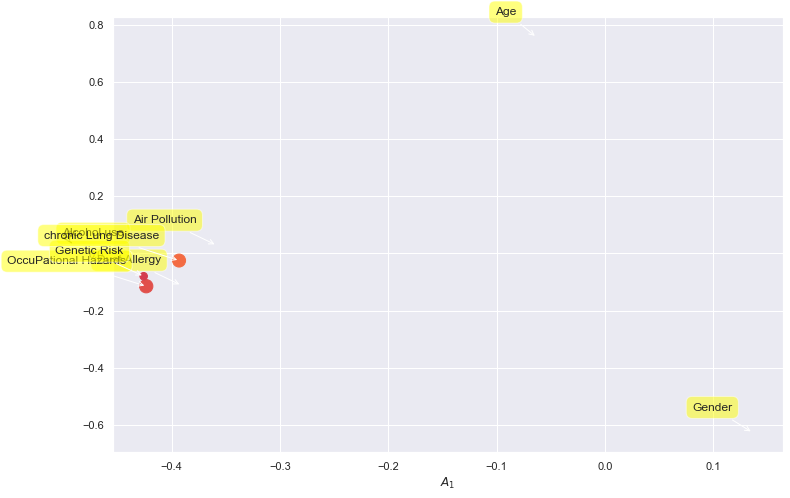

In [230]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Eigenvalues:
[4.94140845 1.14211247 0.79377199 0.45544271 0.38015136 0.1366164
 0.10636291 0.0521417 ]


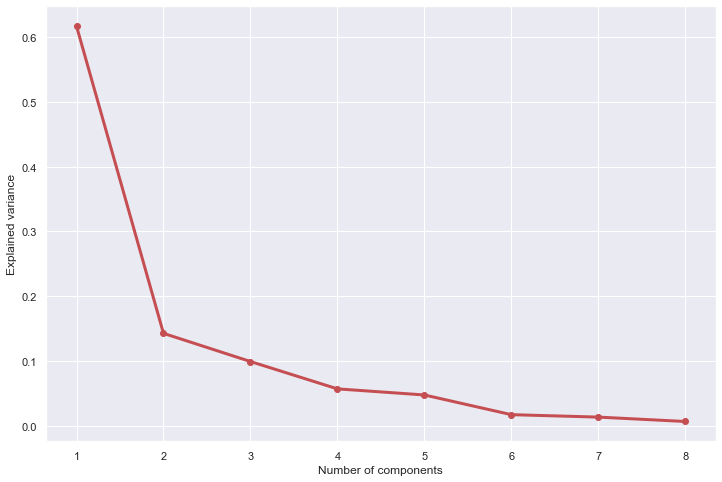

In [231]:
#Eigenvalues


# ScreenPlot
Lambda = pca.explained_variance_
print(f'Eigenvalues:\n{Lambda}')
plt.figure()
x= np.arange(len(Lambda))+1
plt.plot(x,Lambda/sum(Lambda),'ro-',lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()
# ax = plt.gca()
# ax
# line = ax.lines[0]
# line.get_xydata()

Text(0, 0.5, 'Cumulative explained variance')

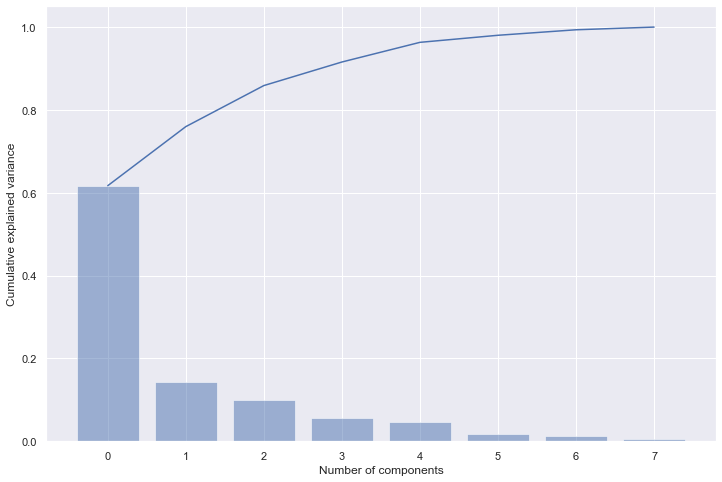

In [232]:
# Explained Variance
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [233]:
# Explained Variance per PC
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (61.7%)',
 '1': 'PC 2 (14.3%)',
 '2': 'PC 3 (9.9%)',
 '3': 'PC 4 (5.7%)',
 '4': 'PC 5 (4.7%)',
 '5': 'PC 6 (1.7%)',
 '6': 'PC 7 (1.3%)',
 '7': 'PC 8 (0.7%)'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


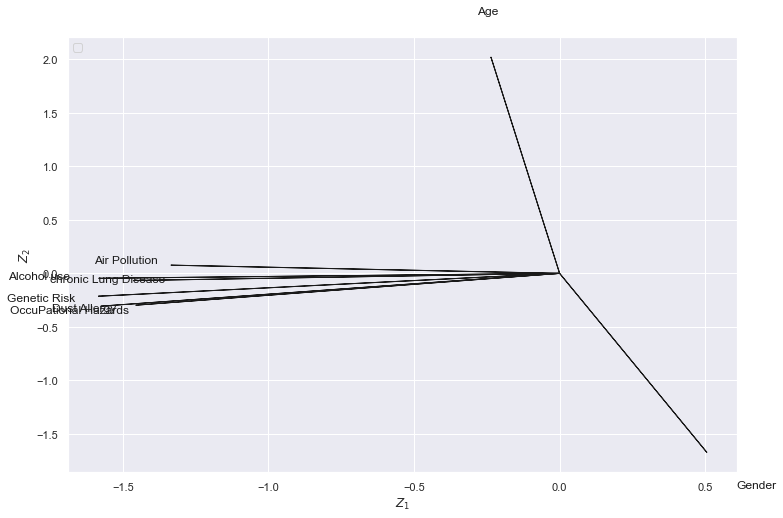

In [234]:
# BIPLOT
#0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]
A3 = A[:,2]
Z3 = A[:,2]
# print(Z1,Z2)
plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
#     plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),A3[i]*max(Z3), color='k', width=0.0005, head_width=0.0025)
#     plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,A3[i]*max(Z3)*1.2,variables[i], color='k')

# plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
# plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
# plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')

In [237]:
model = pca()
# Fit transform for standardized data
out = model.fit_transform(df_st)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [238]:
# Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC               feature   loading  type
0  PC1          Genetic Risk -0.425740  best
1  PC2                   Age  0.757220  best
2  PC3                Gender  0.755574  best
3  PC4         Air Pollution -0.849368  best
4  PC5          Dust Allergy  0.710788  best
5  PC1           Alcohol use -0.425354  weak
6  PC1  OccuPational Hazards -0.423405  weak
7  PC5  chronic Lung Disease -0.616533  weak


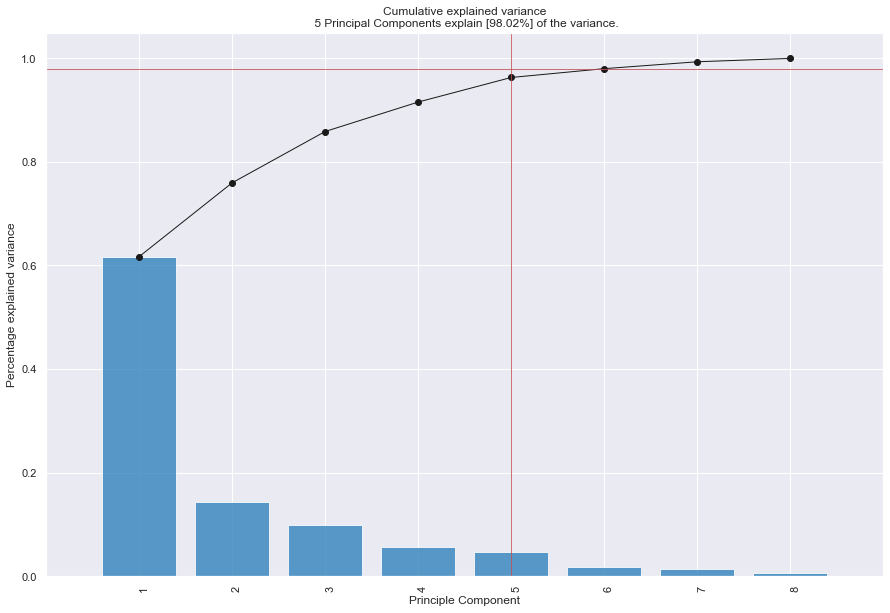

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [98.02%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 864x576 with 0 Axes>

In [239]:
model.plot()

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [1000] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1000] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


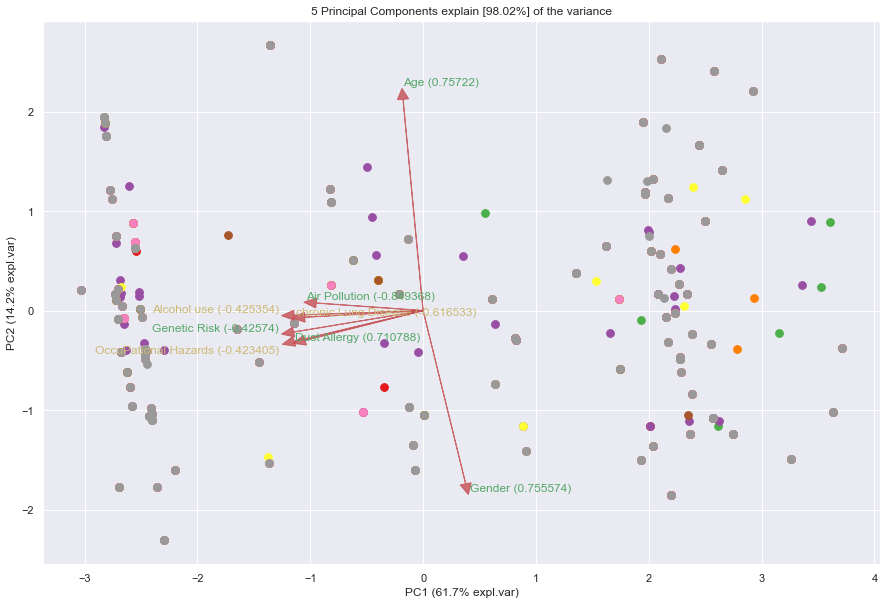

In [240]:
ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


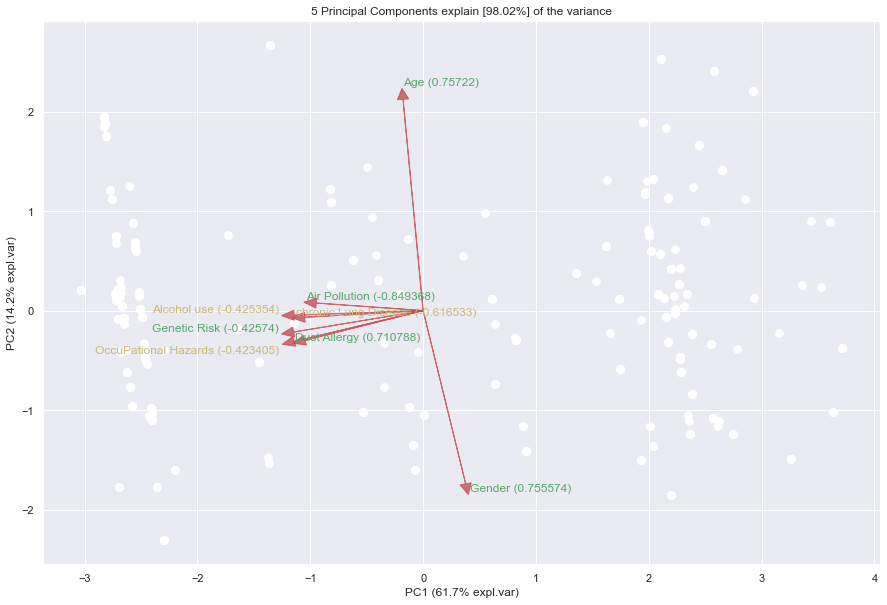

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [98.02%] of the variance'}, xlabel='PC1 (61.7% expl.var)', ylabel='PC2 (14.2% expl.var)'>)

In [241]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [1000] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [1000] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


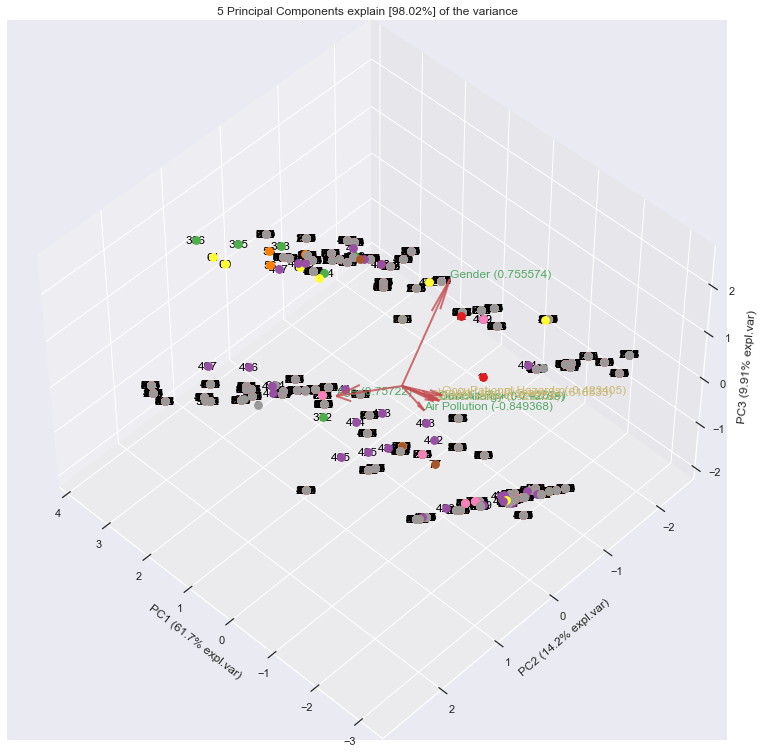

In [242]:
ax = model.biplot3d(legend=False)

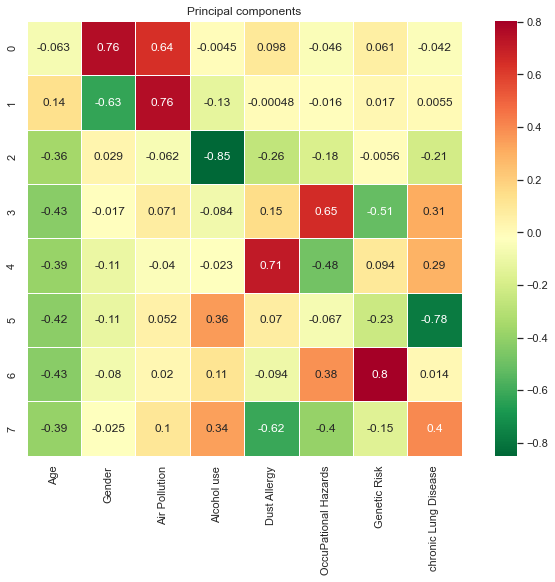

PC1:[-0.0634089   0.13589697 -0.35856959 -0.4253544  -0.39113182 -0.42340511
 -0.42574031 -0.39306743]
PC2:[ 0.75721975 -0.62678284  0.02872929 -0.01730058 -0.11143316 -0.11485166
 -0.0799915  -0.02509874]


In [243]:
# Principal Components
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


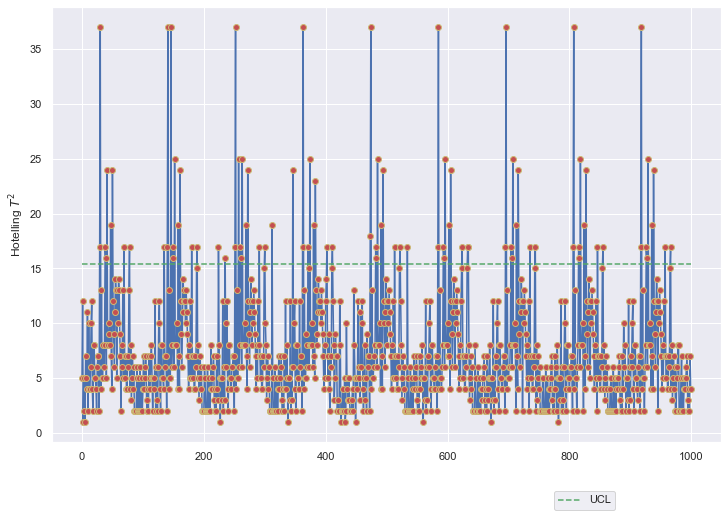

In [244]:
# Hotellings T2 Test
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

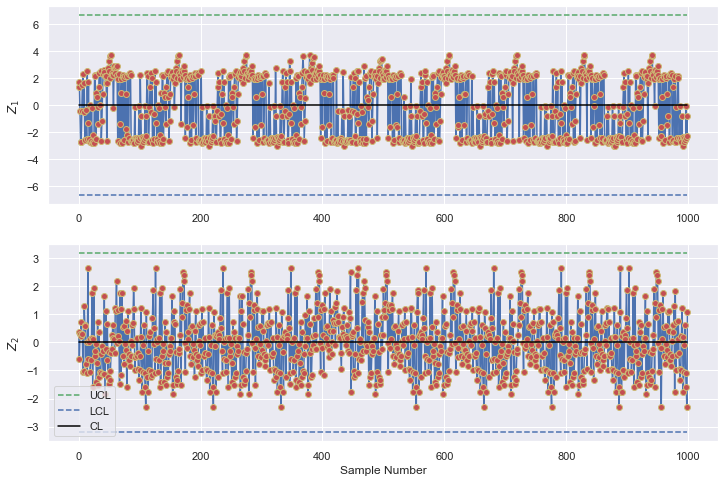

In [245]:
# Control Charts for Principal Components
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [246]:
# Out of control points from above
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[]


In [247]:
# MULTI CLASS CLASSIFICATION
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df_st, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']
scoring

Train Dataset Size: 700
Test Dataset Size: 300


['f1_macro']

GNb Score:  0.61
DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.608     0.879     0.719        99
           1      0.339     0.226     0.271        93
           2      0.789     0.694     0.739       108

    accuracy                          0.610       300
   macro avg      0.579     0.600     0.576       300
weighted avg      0.590     0.610     0.587       300

Confusion Matrix for GNB: 
[[87  8  4]
 [56 21 16]
 [ 0 33 75]]


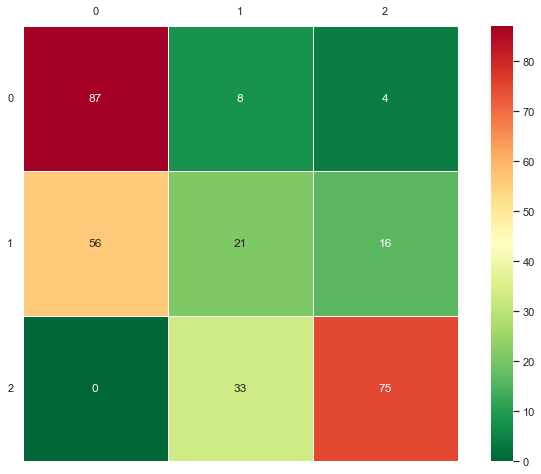

GNb Score:  0.77
DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.784     0.808     0.796        99
           1      0.685     0.656     0.670        93
           2      0.826     0.833     0.829       108

    accuracy                          0.770       300
   macro avg      0.765     0.766     0.765       300
weighted avg      0.769     0.770     0.769       300

Confusion Matrix for GNB: 
[[80 15  4]
 [17 61 15]
 [ 5 13 90]]


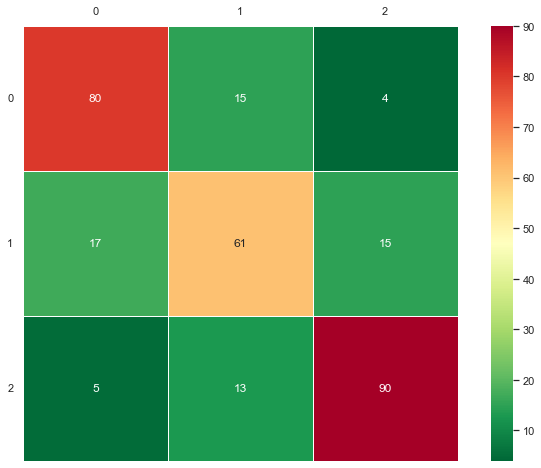

GNb Score:  0.5766666666666667
DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.592     0.879     0.707        99
           1      0.220     0.118     0.154        93
           2      0.728     0.694     0.711       108

    accuracy                          0.577       300
   macro avg      0.513     0.564     0.524       300
weighted avg      0.526     0.577     0.537       300

Confusion Matrix for GNB: 
[[87  6  6]
 [60 11 22]
 [ 0 33 75]]


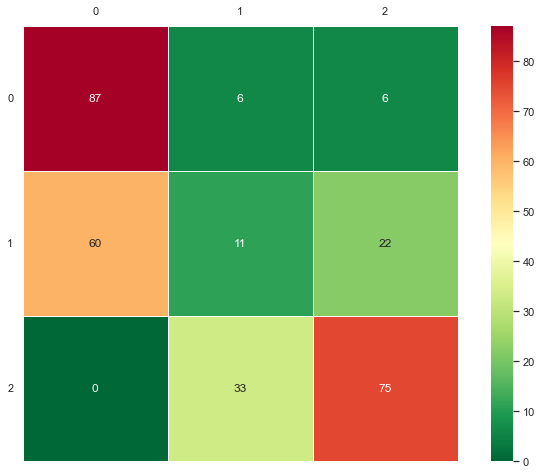

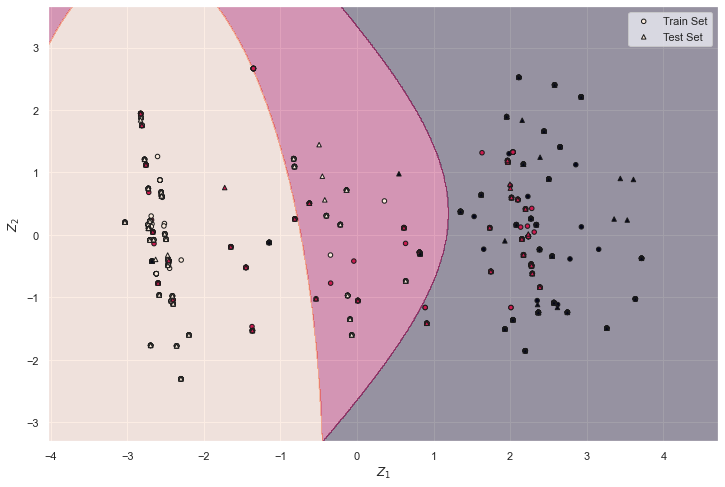

(array([  1,   2,   3,   5,   6,   7,   8,  17,  19,  20,  21,  29,  34,
        35,  38,  40,  42,  43,  44,  47,  49,  50,  51,  53,  54,  55,
        58,  62,  64,  65,  68,  69,  70,  71,  72,  73,  74,  78,  79,
        80,  84,  85,  87,  94,  96, 100, 102, 105, 106, 108, 113, 116,
       121, 125, 126, 131, 138, 139, 140, 142, 143, 151, 152, 155, 157,
       158, 159, 160, 164, 169, 170, 175, 178, 180, 181, 192, 193, 195,
       199, 200, 205, 206, 207, 208, 210, 211, 212, 219, 221, 222, 224,
       225, 229, 230, 231, 232, 237, 238, 239, 243, 247, 249, 250, 252,
       253, 254, 255, 257, 258, 259, 263, 267, 268, 269, 271, 274, 276,
       277, 283, 285, 286, 289, 290, 291, 292, 293, 297]),)


In [249]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  print("GNb Score: ",gnb_score)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  print("Confusion Matrix for GNB: ")
  print(cm_gnb)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))


Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.000808  0.000776  0.000767  0.000754  0.000770
knn_Z  fit_time              0.000401  0.000392  0.000390  0.000390  0.000384
knn_Z12 fit_time             0.000337  0.000348  0.000331  0.000322  0.000330
knn_full_data test_f1_macro  0.952222  0.951313  0.958333  0.993263  0.979790
knn_Z  test_f1_macro         0.952222  0.951313  0.958333  0.993263  0.979790
knn_Z12 test_f1_macro        0.952222  0.973039  0.942312  1.000000  0.978237

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.970     0.985        99
           1      0.939     1.000     0.969        93
           2      0.990     0.963     0.977       108

    accuracy                          0.977       300
   macro avg      0.977     0.978   

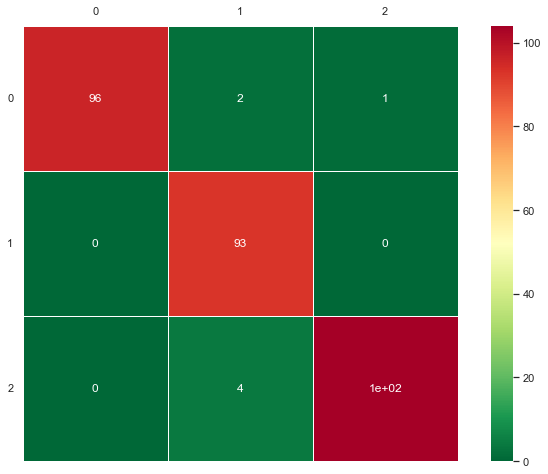

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.970     0.985        99
           1      0.939     1.000     0.969        93
           2      0.990     0.963     0.977       108

    accuracy                          0.977       300
   macro avg      0.977     0.978     0.977       300
weighted avg      0.978     0.977     0.977       300



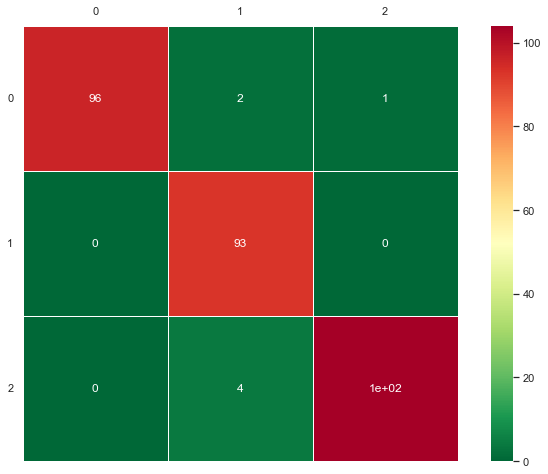

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.990     0.980     0.985        99
           1      0.978     0.978     0.978        93
           2      0.972     0.981     0.977       108

    accuracy                          0.980       300
   macro avg      0.980     0.980     0.980       300
weighted avg      0.980     0.980     0.980       300



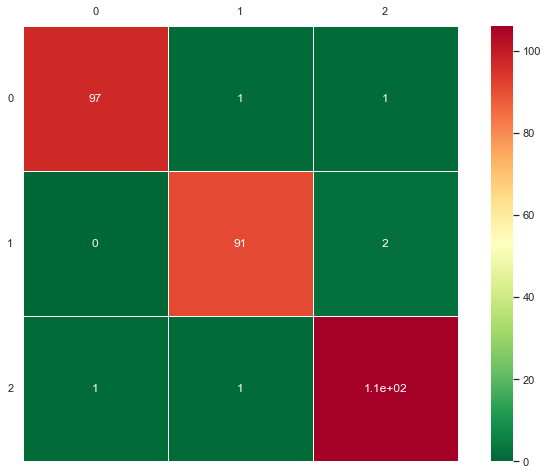

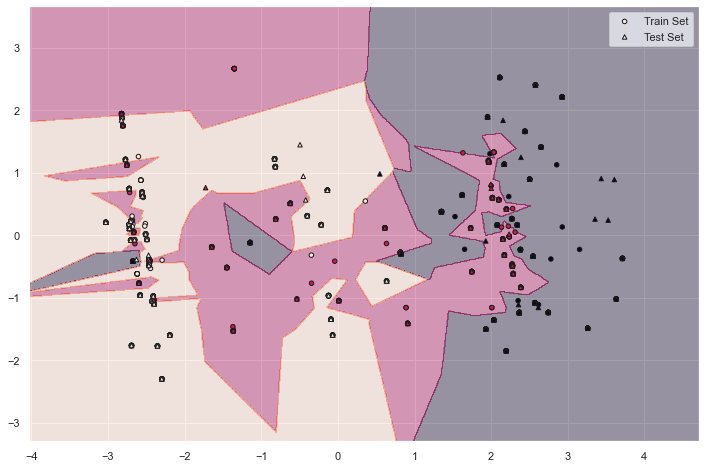

In [250]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

In [204]:
# !pip install sklearn

# !pip install pycaret
from pycaret.utils import version
version()

'2.2.2'

In [205]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [206]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (900, 9)
Unseen Data For Predictions: (100, 9)


In [208]:
from pycaret.classification import *
clf = setup(data=data, target='Level', train_size=0.7, session_id=123)

OSError: dlopen(/Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <8DF2AF67-B85F-3F67-B687-E50A514307EC> /Users/danishkarur/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [209]:
 best_model = compare_models() 

NameError: name 'compare_models' is not defined